In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd 

In [2]:
 # Import data into pandas from CSV
tp='C:/Users/emhar/Desktop/PythonStuff/Project/Traffic_Crashes_-_People.csv'
traffic_people=pd.read_csv(tp)


C:\Users\emhar\Anaconda3\envs\pleasework\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,19,20,21,22,23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tv='C:/Users/emhar/Desktop/PythonStuff/Project/Traffic_Crashes_-_Vehicles.csv'
traffic_vehicles=pd.read_csv(tv)


C:\Users\emhar\Anaconda3\envs\pleasework\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,39,40,41,43,47,48,49,54,57,58,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tc='C:/Users/emhar/Desktop/PythonStuff/Project/Traffic_Crashes_-_Crashes.csv'
traffic_crashes=pd.read_csv(tc)


In [5]:
rlcl='C:/Users/emhar/Desktop/PythonStuff/Project/Red_Light_Camera_Locations.csv'
red_locations=pd.read_csv(rlcl)


In [6]:

scl = 'C:/Users/emhar/Desktop/PythonStuff/Project/Speed_Camera_Locations.csv'
speed_locations = pd.read_csv(scl)


In [7]:
scv='C:/Users/emhar/Desktop/PythonStuff/Project/Speed_Camera_Violations.csv'
speed_violations=pd.read_csv(scv)
speed_violations['LONGITUDE'].dropna(how='any', inplace=True)  
speed_violations.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [8]:
rlcv='C:/Users/emhar/Desktop/PythonStuff/Project/Red_Light_Camera_Violations.csv'
red_violations=pd.read_csv(rlcv)
red_violations.dropna(how='any', inplace=True)  
red_violations.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
1,RIDGE AND CLARK,1051.0,5930 N CLARK STREET,12/09/2014,2,1.164555e+06,1.939389e+06,41.989299,-87.670104,"(41.98929863013193, -87.67010412112992)"
4,PULASKI AND FULLERTON,1484.0,4000 W FULLERTON AVE,11/29/2017,2,1.149303e+06,1.915695e+06,41.924593,-87.726819,"(41.92459302175305, -87.7268192684032)"
16,MADISON AND WESTERN,1934.0,2400 W MADISON,01/13/2016,3,1.160385e+06,1.899989e+06,41.881271,-87.686536,"(41.88127050428818, -87.68653594017124)"
40,LAWRENCE AND CICERO,1041.0,4800 N CICERO AVE,10/20/2016,7,1.143465e+06,1.931491e+06,41.968048,-87.747876,"(41.968048007293845, -87.74787598468126)"
42,LAWRENCE AND WESTERN,1192.0,4800 N WESTERN AVENUE,06/17/2018,7,1.159460e+06,1.931821e+06,41.968641,-87.689054,"(41.96864072747715, -87.6890542408374)"


In [9]:
regions='C:/Users/emhar/Desktop/PythonStuff/Project/Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv'
regions_df=pd.read_csv(regions)
regions_df1=regions_df.loc[:," REGION_ID":" NORTH"]
regions_df1.head()

,REGION_ID,WEST,EAST,SOUTH,NORTH
0,2,-87.846210,-87.747456,41.960669,42.019100
1,3,-87.747456,-87.674590,41.960669,41.997946
2,4,-87.674590,-87.646438,41.960669,41.997946
3,7,-87.747456,-87.674590,41.909269,41.931841
4,1,-87.709645,-87.654561,41.997946,42.026444


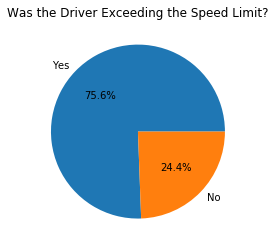

In [10]:
#Graph speeding information
speed_limit=traffic_vehicles['EXCEED_SPEED_LIMIT_I'].value_counts()
labels = ["Yes", "No"]
plt.pie(speed_limit, labels=labels, autopct = "%1.1f%%")
plt.title("Was the Driver Exceeding the Speed Limit?")
plt.savefig("SpeedLimit.png", bbox_inches="tight")

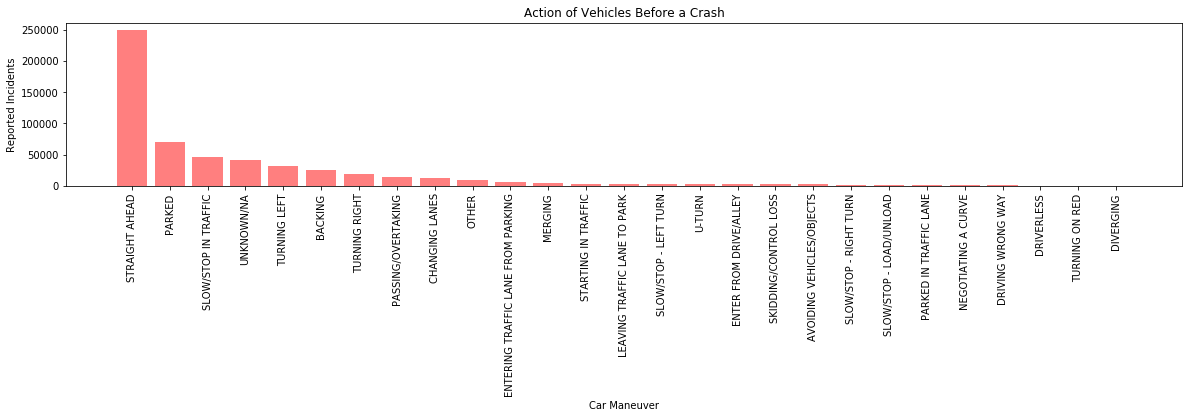

In [11]:
# separate and graph vehicle action before crash
tvtv=traffic_vehicles['MANEUVER'].value_counts()
maneuver_df= pd.DataFrame(tvtv)


plt.figure(figsize=(20,3))
maneuver_df=maneuver_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
maneuver_df

x_axis = np.arange(len(maneuver_df['index']))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, maneuver_df["index"], rotation='vertical')
plt.bar(x_axis, maneuver_df['MANEUVER'], color='r', alpha=0.5, align="center")

plt.xlabel("Car Maneuver")
plt.ylabel("Reported Incidents")
plt.title("Action of Vehicles Before a Crash")
plt.savefig("Maneuver.png", bbox_inches="tight")




In [12]:
# Pull data for crashes by Blood Alcohol Concentration 
bac_people=traffic_people['BAC_RESULT VALUE'].value_counts()
bac_df= pd.DataFrame(bac_people)

bac_df1=bac_df.reset_index(level=None, drop=False, inplace=False)
    
bac_index1 = bac_df1.sort_values(["index"], ascending=True)

bac_index2=bac_index1.reset_index(level=None, drop=False, inplace=False)

bac_index2
bac_index3=bac_index2.drop([bac_index2.index[0]])


del bac_index3['level_0']
bac_index3.head()



,index,BAC_RESULT VALUE
1,0.01,1
2,0.02,2
3,0.03,5
4,0.04,3
5,0.05,4


In [13]:
#clean the data 
bac_index4=bac_index3.drop([bac_index3.index[47]])
bac_index5=bac_index4.drop([bac_index4.index[46]])
bac_index6=bac_index5.drop([bac_index5.index[45]])
bac_index7=bac_index6.drop([bac_index6.index[44]])
bac_index8=bac_index7.drop([bac_index6.index[43]])

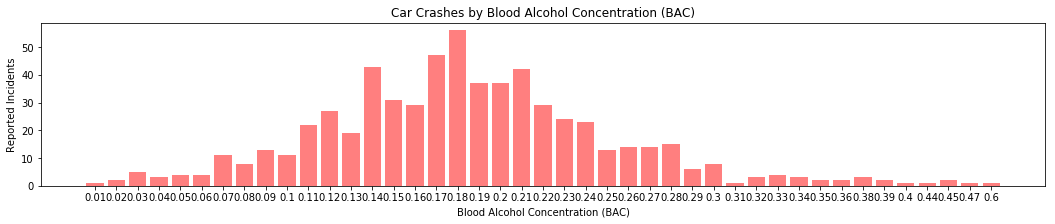

In [14]:
#plot BAC data
plt.figure(figsize=(18,3))                 
x_axis = np.arange(len(bac_index8['index']))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, bac_index8['BAC_RESULT VALUE'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, bac_index8["index"], rotation="horizontal")
plt.xlabel("Blood Alcohol Concentration (BAC)")
plt.ylabel("Reported Incidents")
plt.title("Car Crashes by Blood Alcohol Concentration (BAC)")
plt.savefig("BAC_bargraph", bbox_inches="tight")

In [42]:
#pull out age of drivers 
age_driver=traffic_people[['PERSON_TYPE','AGE']]
ageage_df= pd.DataFrame(age_driver)
ageage_df.dropna(how='any', inplace=True)  
age_driver1=ageage_df.loc[ageage_df["PERSON_TYPE"] == "DRIVER", :]
age_driver1.head()


,PERSON_TYPE,AGE
2,DRIVER,31.0
3,DRIVER,29.0
5,DRIVER,63.0
6,DRIVER,20.0
7,DRIVER,18.0


In [16]:
#clean driver data
traf2=age_driver1.sort_values(["AGE"], ascending=True)
traf3=traf2['AGE'].value_counts()

traf_age= pd.DataFrame(traf3)

traf_age2=traf_age.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
traf_age3=traf_age2.sort_values(["index"], ascending=True)

age_drive22=traf_age3.loc[traf_age3['index'] > 14, :]
age_drive=age_drive22.loc[traf_age3['index'] < 102, :]

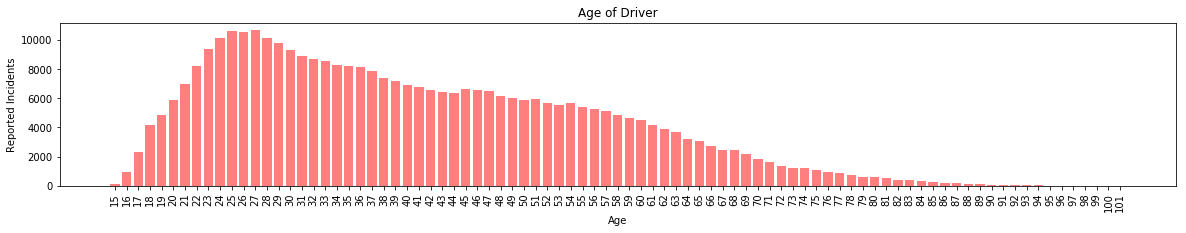

In [17]:
#plot age of driver 
plt.figure(figsize=(20,3))
plt.bar(age_drive['index'], age_drive['AGE'], color='r', alpha=0.5, align="center")
plt.xticks(age_drive["index"], rotation='vertical')
plt.xlabel("Age")
plt.ylabel("Reported Incidents")
plt.title("Age of Driver")
plt.savefig("AGE.png", bbox_inches="tight")

In [18]:
#Examine driver action at time of crash
trafffic_people=traffic_people['DRIVER_ACTION'].value_counts()
trafffic_people
traffic_people_df2= pd.DataFrame(trafffic_people)
traffic_people_df = traffic_people_df2.drop([traffic_people_df2.index[0] , traffic_people_df2.index[1]])
traffic_people_df2=traffic_people_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
traffic_people_df2

,index,DRIVER_ACTION
0,FAILED TO YIELD,48594
1,OTHER,40174
2,FOLLOWED TOO CLOSELY,34781
3,IMPROPER BACKING,16715
4,IMPROPER LANE CHANGE,14099
5,IMPROPER TURN,13272
6,IMPROPER PASSING,11197
7,TOO FAST FOR CONDITIONS,8327
8,DISREGARDED CONTROL DEVICES,7039
9,IMPROPER PARKING,1995


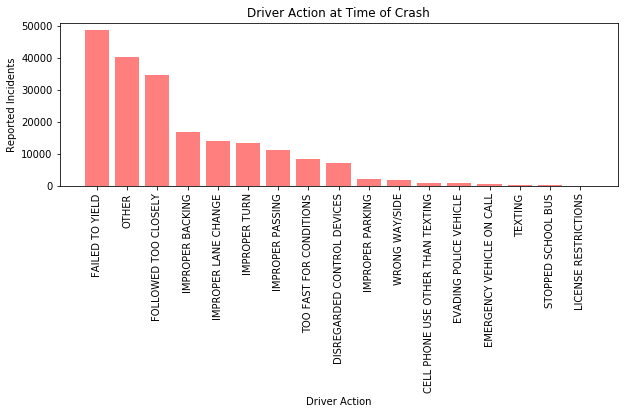

In [19]:
#plot driver action at time of crash
plt.figure(figsize=(10,3))
x_axis = np.arange(len(traffic_people_df2['index']))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, traffic_people_df2['DRIVER_ACTION'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, traffic_people_df2["index"], rotation="vertical")
plt.xlabel("Driver Action")
plt.ylabel("Reported Incidents")
plt.title("Driver Action at Time of Crash")
plt.savefig("Driver_Action.png", bbox_inches="tight")

In [20]:
# Examine and graph Primary cause of crash data
primary_cause=pd.DataFrame(traffic_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts())
primary_cause=primary_cause.drop([primary_cause.index[0]])

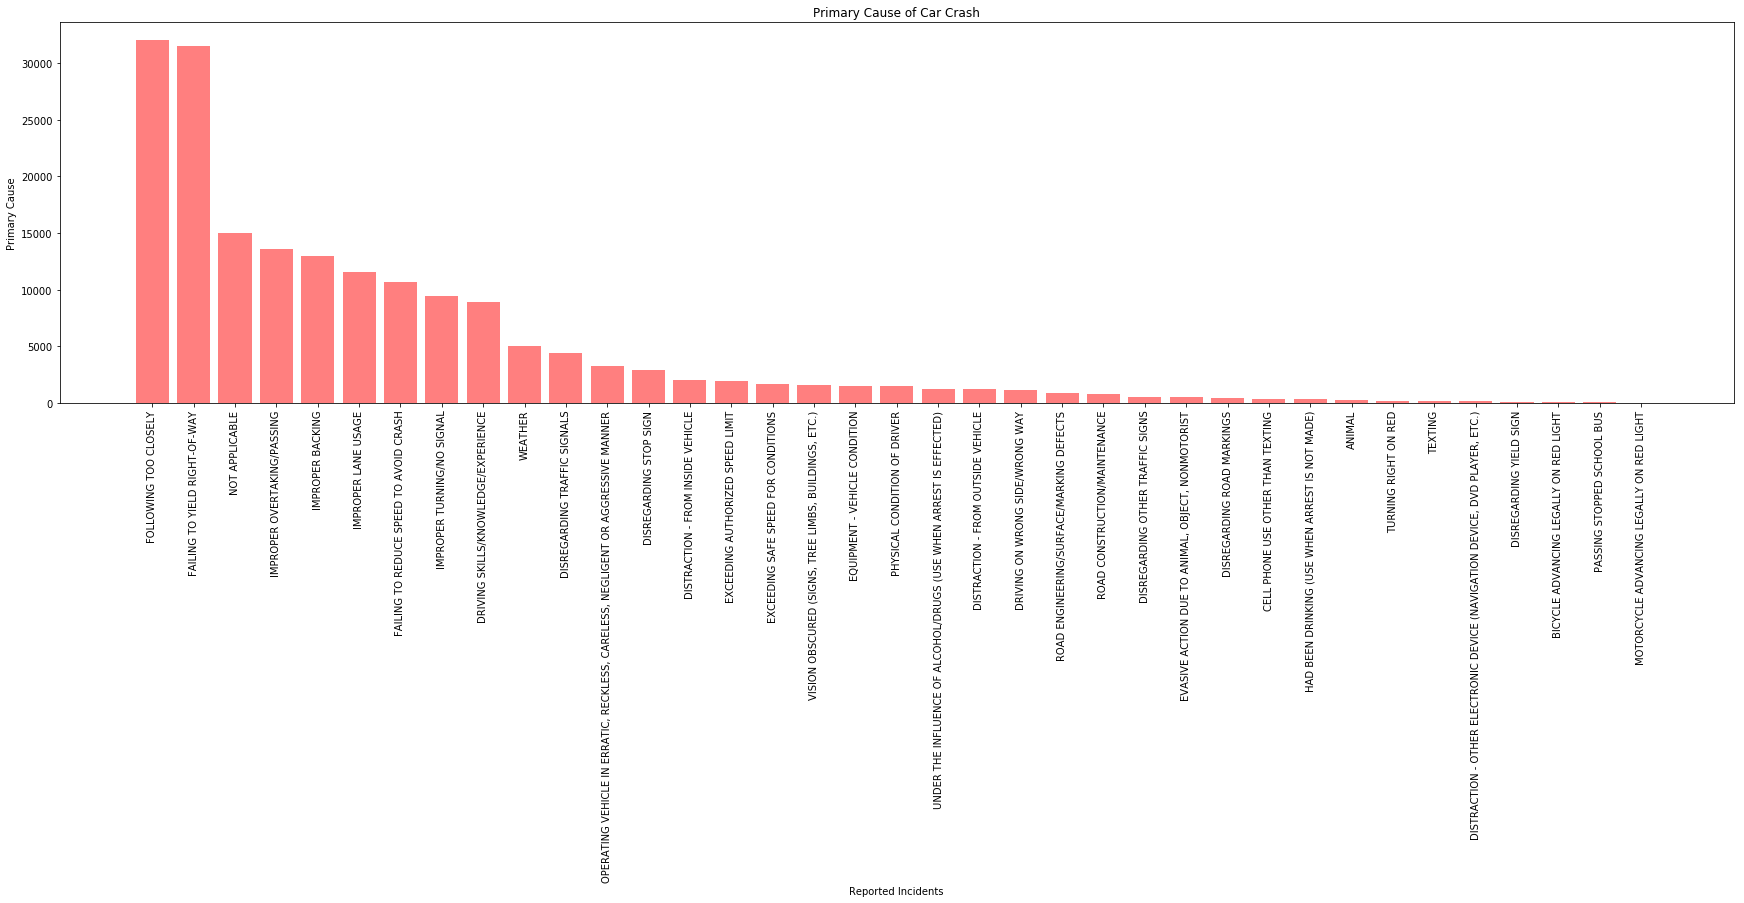

In [21]:
plt.figure(figsize=(30,7))
plt.ylabel("Primary Cause")
plt.xlabel("Reported Incidents")
plt.title("Primary Cause of Car Crash")

primary_cause3=primary_cause.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
primary_cause2=primary_cause3.sort_values(["PRIM_CONTRIBUTORY_CAUSE"], ascending=False)

x_axis = np.arange(len(primary_cause2['index']))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, primary_cause2['PRIM_CONTRIBUTORY_CAUSE'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, primary_cause2["index"], rotation="vertical")

plt.savefig("primary_cause.png", bbox_inches="tight")



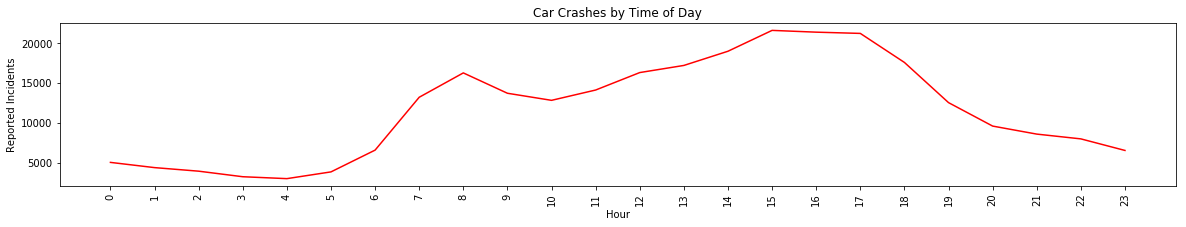

In [22]:
# examine and map crashes by time of day 
time = traffic_crashes["CRASH_HOUR"].value_counts()
time_df= pd.DataFrame(time)
time_df

plt.figure(figsize=(20,3))
plt.xlabel("Hour")
plt.ylabel("Reported Incidents")
plt.title("Car Crashes by Time of Day")
time_df2=time_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
time_df3=time_df2.sort_values(["index"], ascending=True)
x_axis = np.arange(len(time_df3['index']))
tick_locations = [value for value in x_axis]
plt.plot(x_axis, time_df3['CRASH_HOUR'], color='r')
plt.xticks(tick_locations, time_df3["index"], rotation="vertical")
plt.savefig("time.png", bbox_inches="tight")

In [23]:
# find mean posted speed limit 
mean_speed=traffic_crashes['POSTED_SPEED_LIMIT'].describe()
mean_speed

count    279796.000000
mean         28.166189
std           6.900005
min           0.000000
25%          30.000000
50%          30.000000
75%          30.000000
max          99.000000
Name: POSTED_SPEED_LIMIT, dtype: float64

In [24]:

#Split column for crashdate on date
speed_violations["Year"] = pd.DatetimeIndex(speed_violations["VIOLATION DATE"]).year


In [25]:
#drop 2014 data 
indexNames = speed_violations[ speed_violations['Year'] == 2014 ].index
 
# Delete these row indexes from dataFrame
speed_violations.drop(indexNames , inplace=True)

In [26]:
yearlyspeed = speed_violations.groupby(["Year"])
yearlyspeed['VIOLATIONS'].count()

Year
2015    37872
2016    38998
2017    38346
2018    39234
2019     7634
Name: VIOLATIONS, dtype: int64

In [27]:
#Split column for crashdate on date
red_violations["Year"] = pd.DatetimeIndex(red_violations["VIOLATION DATE"]).year


In [28]:
# drop 2014 data
indexNames = red_violations[ red_violations['Year'] == 2014 ].index
 
red_violations.drop(indexNames , inplace=True)

yearlyred = red_violations.groupby(["Year"])
count_red=yearlyred['VIOLATIONS'].count()
#count_red

In [29]:
# speed violations by location
grouped_SPEED = speed_violations.groupby(['LATITUDE', 'LONGITUDE'])
SPEED = grouped_SPEED['VIOLATIONS'].sum()
speed_v_df= pd.DataFrame(SPEED)
speed_df=speed_v_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
speed_df["Region ID"] = ""
speed_df.head()



,LATITUDE,LONGITUDE,VIOLATIONS,Region ID
0,41.663174,-87.633520,217833,
1,41.690702,-87.664122,7633,
2,41.691025,-87.664248,16771,
3,41.691202,-87.717211,13083,
4,41.706268,-87.682391,2539,


In [30]:
# red light violations by location
grouped_RED = red_violations.groupby(['LATITUDE', 'LONGITUDE'])
RED = grouped_RED['VIOLATIONS'].sum()
red_v_df= pd.DataFrame(RED)
red_df=red_v_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
red_df["Region ID"] = ""
red_df.head()

,LATITUDE,LONGITUDE,VIOLATIONS,Region ID
0,41.677721,-87.642052,9335,
1,41.677923,-87.641990,4032,
2,41.685190,-87.642280,3130,
3,41.692161,-87.663472,366,
4,41.692263,-87.642523,11760,


In [31]:
# assign region ids to red light violations
for index, row in red_df.iterrows():
    for index2, row2 in regions_df1.iterrows():
        if ((red_df["LATITUDE"][index] < regions_df1[" NORTH"][index2]) & (red_df["LATITUDE"][index] > regions_df1[" SOUTH"][index2]) & (red_df["LONGITUDE"][index] > regions_df1[" WEST"][index2]) & (red_df["LONGITUDE"][index] < regions_df1[" EAST"][index2])):
            red_df["Region ID"][index] = regions_df1[" REGION_ID"][index2]

C:\Users\emhar\Anaconda3\envs\pleasework\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
red_df.head()

,LATITUDE,LONGITUDE,VIOLATIONS,Region ID
0,41.677721,-87.642052,9335,26
1,41.677923,-87.641990,4032,26
2,41.685190,-87.642280,3130,26
3,41.692161,-87.663472,366,25
4,41.692263,-87.642523,11760,26


In [33]:
#find red light violations by region
grouped_redregion= red_df.groupby(['Region ID'])
grouped_redregion2=grouped_redregion['VIOLATIONS'].sum()
grouped_redregion2
red_violation_region= pd.DataFrame(grouped_redregion2)
red_viol_region=red_violation_region.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
red_viol_region.rename(columns={'VIOLATIONS': 'Red Light Violations'}, inplace=True)
red_viol_region.head()

,Region ID,Red Light Violations
0,1,20757
1,2,58419
2,3,102160
3,4,71024
4,5,104053


In [34]:
#assign region ids for speed violations
for index, row in speed_df.iterrows():
    for index2, row2 in regions_df1.iterrows():
        if ((speed_df["LATITUDE"][index] < regions_df1[" NORTH"][index2]) & (speed_df["LATITUDE"][index] > regions_df1[" SOUTH"][index2]) & (speed_df["LONGITUDE"][index] > regions_df1[" WEST"][index2]) & (speed_df["LONGITUDE"][index] < regions_df1[" EAST"][index2])):
            speed_df["Region ID"][index] = regions_df1[" REGION_ID"][index2]

C:\Users\emhar\Anaconda3\envs\pleasework\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
speed_df.head()

,LATITUDE,LONGITUDE,VIOLATIONS,Region ID
0,41.663174,-87.633520,217833,28
1,41.690702,-87.664122,7633,25
2,41.691025,-87.664248,16771,25
3,41.691202,-87.717211,13083,25
4,41.706268,-87.682391,2539,25


In [36]:
#find speed violations by region
grouped_speedregion= speed_df.groupby(['Region ID'])
grouped_speedregion2=grouped_speedregion['VIOLATIONS'].sum()
speed_violation_region= pd.DataFrame(grouped_speedregion2)
speed_viol_region=speed_violation_region.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
speed_viol_region.rename(columns={'VIOLATIONS': 'Speed Violations'}, inplace=True)
speed_viol_region.head()

,Region ID,Speed Violations
0,1,51566
1,2,482448
2,3,386615
3,4,45575
4,5,259298


In [37]:
#merge violations data by region id dataframes
viol_all2= pd.merge(speed_viol_region, red_viol_region, on="Region ID", how="outer")
viol_all = viol_all2.sort_values(["Region ID"], ascending=True)
violations=viol_all.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
violations.head()

,index,Region ID,Speed Violations,Red Light Violations
0,0,1,51566.0,20757.0
1,1,2,482448.0,58419.0
2,2,3,386615.0,102160.0
3,3,4,45575.0,71024.0
4,4,5,259298.0,104053.0


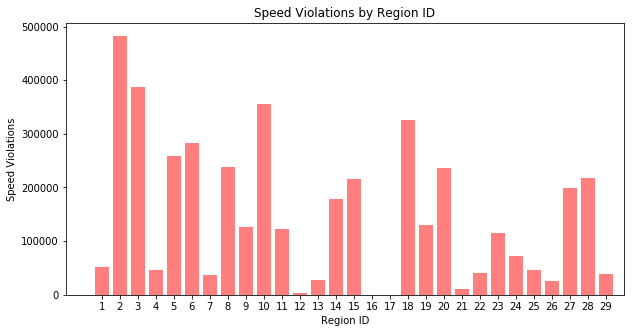

In [38]:
#map speed violations by region id 
plt.figure(figsize=(10,5))
x_axis = np.arange(len(violations['Region ID']))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, violations['Speed Violations'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, violations["Region ID"])
plt.xlim(-2,29)
plt.xlabel("Region ID")
plt.ylabel("Speed Violations")
plt.title("Speed Violations by Region ID")
plt.savefig("SpeedVio.png", bbox_inches="tight")

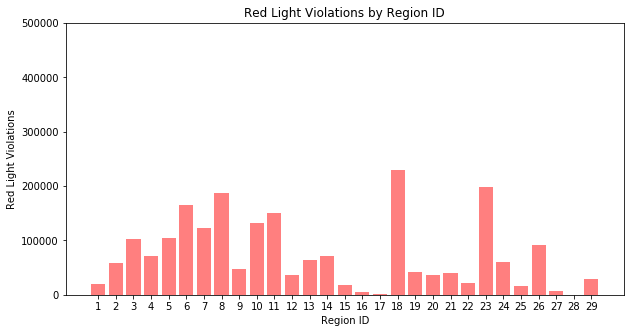

In [39]:
#plot red light violations by region id and scale to match speed violations
plt.figure(figsize=(10,5))
x_axis = np.arange(len(violations['Region ID']))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, violations['Red Light Violations'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, violations["Region ID"])
plt.xlabel("Region ID")
plt.ylabel("Red Light Violations")
plt.ylim(0,500000)
plt.title("Red Light Violations by Region ID")
plt.savefig("RedLVio.png", bbox_inches="tight")

In [43]:
# merge vehicle, crash, and people data on police report number 
merge_table = pd.merge(traffic_vehicles, traffic_crashes, on="RD_NO", how="outer")


In [45]:
merge_table2 = pd.merge(traffic_people, merge_table, on="RD_NO", how="outer")
merge_table2.to_csv('merge_table2.csv')
merge_table2.head()

,PERSON_ID,PERSON_TYPE,RD_NO,VEHICLE_ID_x,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,O10,DRIVER,HY368708,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,...,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848)
1,O10,DRIVER,HY368708,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,...,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848)
2,O11,DRIVER,HY368708,11.0,08/04/2015 12:40:00 PM,NaN,ORLAND PARK,IL,60462,M,...,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848)
3,O11,DRIVER,HY368708,11.0,08/04/2015 12:40:00 PM,NaN,ORLAND PARK,IL,60462,M,...,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848)
4,O100,DRIVER,HY374018,96.0,07/31/2015 05:50:00 PM,NaN,ELK GROVE,IL,60007,M,...,0.0,0.0,2.0,0.0,17,6,7,41.848588,-87.618689,POINT (-87.618688565091 41.848587734205)


In [51]:
#separate BAC by region id for mapping BAC 
grouped_man = merge_table2[['BAC_RESULT VALUE', 'LATITUDE', 'LONGITUDE']]
BAC_latlong2=pd.DataFrame(grouped_man)
BAC_latlong2.to_csv('BAC.csv')

In [52]:
bac_latlong4=BAC_latlong3.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
bac_latlong4.dropna(how='any', inplace=True)  
bac_latlong4["Region ID"]=""
bac_latlong4.head()

,index,Count,LATITUDE,LONGITUDE,Region ID
313,313,0.04,41.876094,-87.677481,
3714,3714,0.23,41.837782,-87.720563,
3715,3715,0.23,41.837782,-87.720563,
3716,3716,0.23,41.837782,-87.720563,
3717,3717,0.23,41.837782,-87.720563,


In [53]:
#Assign region ID
for index, row in bac_latlong4.iterrows():
    for index2, row2 in regions_df1.iterrows():
        if ((bac_latlong4["LATITUDE"][index] < regions_df1[" NORTH"][index2]) & (bac_latlong4["LATITUDE"][index] > regions_df1[" SOUTH"][index2]) & (bac_latlong4["LONGITUDE"][index] > regions_df1[" WEST"][index2]) & (bac_latlong4["LONGITUDE"][index] < regions_df1[" EAST"][index2])):
            bac_latlong4["Region ID"][index] = regions_df1[" REGION_ID"][index2]

C:\Users\emhar\Anaconda3\envs\pleasework\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [54]:
bac_latlong4.head()

,index,Count,LATITUDE,LONGITUDE,Region ID
313,313,0.04,41.876094,-87.677481,11
3714,3714,0.23,41.837782,-87.720563,14
3715,3715,0.23,41.837782,-87.720563,14
3716,3716,0.23,41.837782,-87.720563,14
3717,3717,0.23,41.837782,-87.720563,14


In [55]:
bac_latlong4['Region ID'].value_counts()

14    115
8     115
18    104
5      93
11     92
7      88
23     87
24     78
9      68
21     64
10     63
19     62
6      61
15     55
3      51
20     50
1      40
26     39
28     29
2      28
27     28
12     26
29     21
22     20
16     15
13     14
4      14
25     12
17      7
        7
Name: Region ID, dtype: int64

In [172]:
#create data frame from the average age of drivers in Illinois data 
age_all=[17, 17, 17, 17, 17, 17, 17, 17, 17, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 14, 32, 32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,37,37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 42, 42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 27, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 67, 67, 67, 67, 67, 67, 67, 67, 72, 72, 72, 72, 72, 72, 72, 77, 77, 77, 77, 77, 77, 82, 82, 82, 82, 90, 90]

In [173]:
import scipy.stats as stats
statses = stats.ttest_ind(40.066, 44.3, equal_var=False)
statses

Ttest_indResult(statistic=nan, pvalue=nan)

In [175]:
age_all_df= pd.DataFrame(age_all)

In [176]:
#Mean of drivers in Illinois
age_all_df.mean()


0    44.079365
dtype: float64

In [177]:
#Mean of drivers involved in crashes in Chicago
age_driver1['AGE'].mean()

40.17736597538698

In [178]:
#run t-test between mean age of total drivers in Illinois and mean age of drivers involved in accidents in Chicago
(t_stat, p) = stats.ttest_ind(age_driver1['AGE'], age_all_df, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is [-3.08281211].
p-value is [0.0023588].


In [183]:
#create a data frame for pair plot
tttt='C:/Users/emhar/Desktop/PythonStuff/Crashes_w_Region_cleaned.csv'
complete_df=pd.read_csv(tttt)

In [181]:
merge_table3 = pd.merge(complete_df, merge_table2, on="RD_NO", how="outer")


In [182]:

organized_df = merge_table3[["LATITUDE","LONGITUDE","EXCEED_SPEED_LIMIT_I"]]
organized_df.dropna(how='any', inplace=True)  
organized_df
organized_df.to_csv('organized_df.csv')

C:\Users\emhar\Anaconda3\envs\pleasework\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
ttt='C:/Users/emhar/Desktop/PythonStuff/regions.csv'
region_df=pd.read_csv(ttt)
region_df1=region_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
region_df1.head()

,index,crash_count,red_light_camera_count,speed_camera_count
0,1,5106,2.0,1.0
1,2,7593,7.0,7.0
2,3,10364,10.0,10.0
3,4,5864,5.0,3.0
4,5,12253,15.0,16.0


In [75]:
cr_df='C:/Users/emhar/Desktop/PythonStuff/congestion_region.csv'
congestion_region=pd.read_csv(cr_df)
congestion_region.head()

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,congestion
0,1,22.179399,347.628862,21.760622,51.643062
1,2,31.168334,460.184192,27.399208,39.112871
2,3,47.428873,728.835985,22.058373,50.981392
3,4,33.396979,514.981728,20.647313,54.117083
4,5,48.083678,845.004620,23.378937,48.046807


In [185]:
merge_region = pd.merge(violations, region_df1, on="index", how="outer")
del merge_region['index']
merge_region['congestion']=congestion_region['congestion']

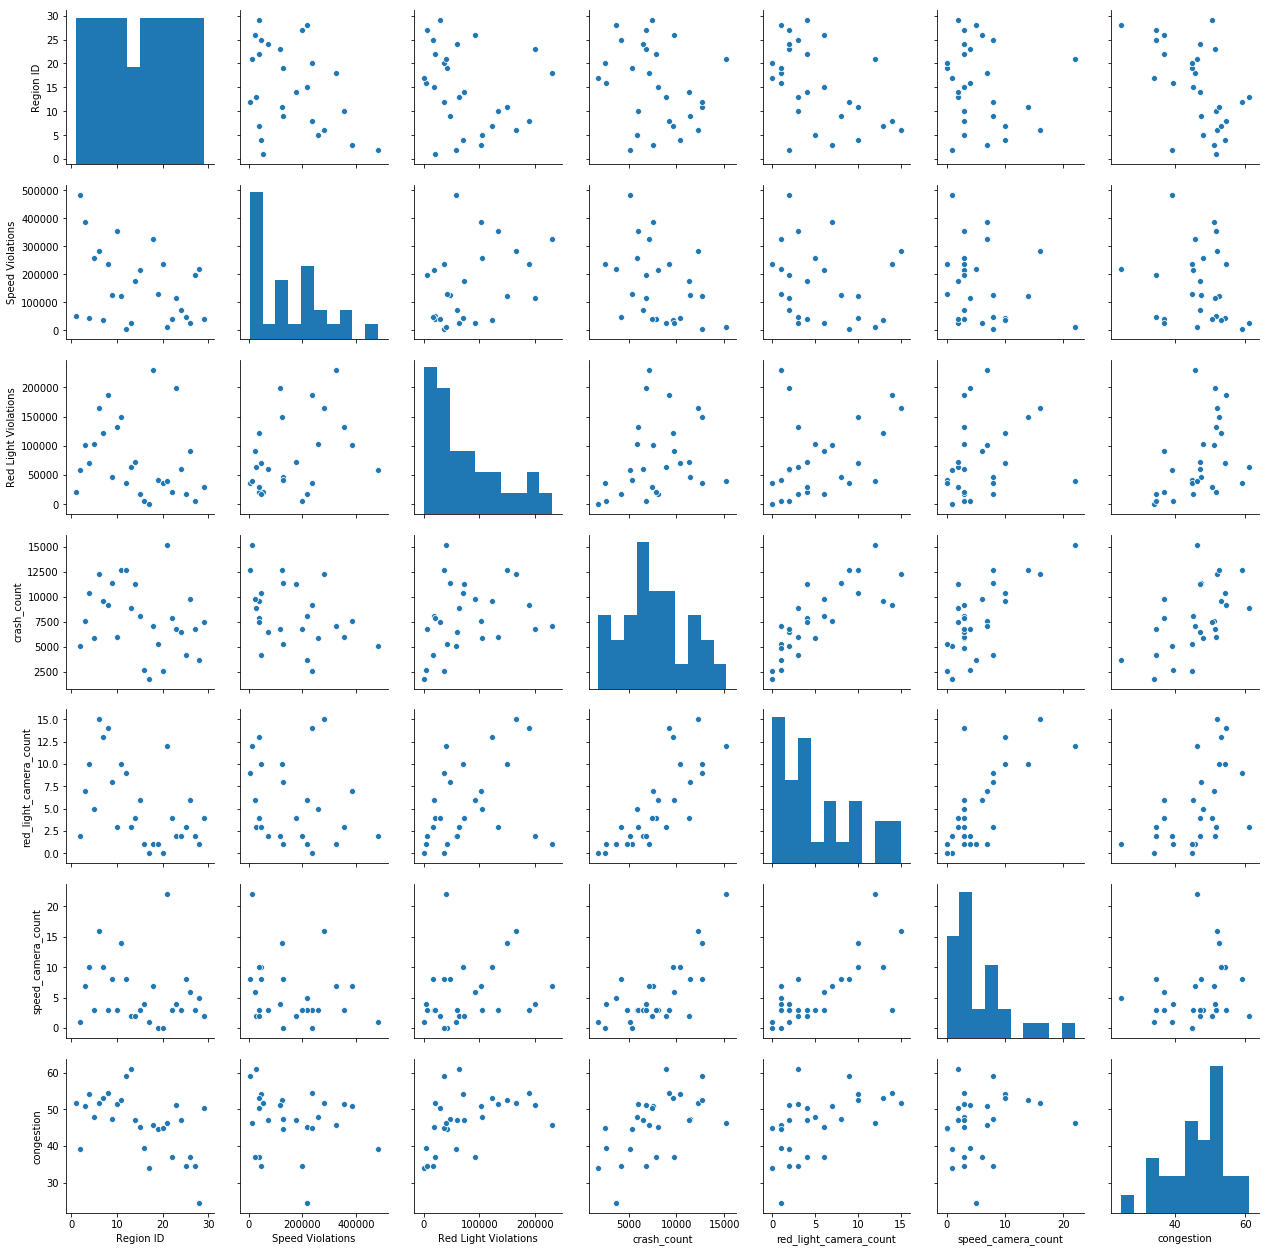

In [186]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(merge_region)